<a href="https://colab.research.google.com/github/Dorthi12/Hawkin-s-Farm/blob/dorthi-ml/cropclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crop Classification


In [1]:
import pandas as pd

df = pd.read_csv("Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


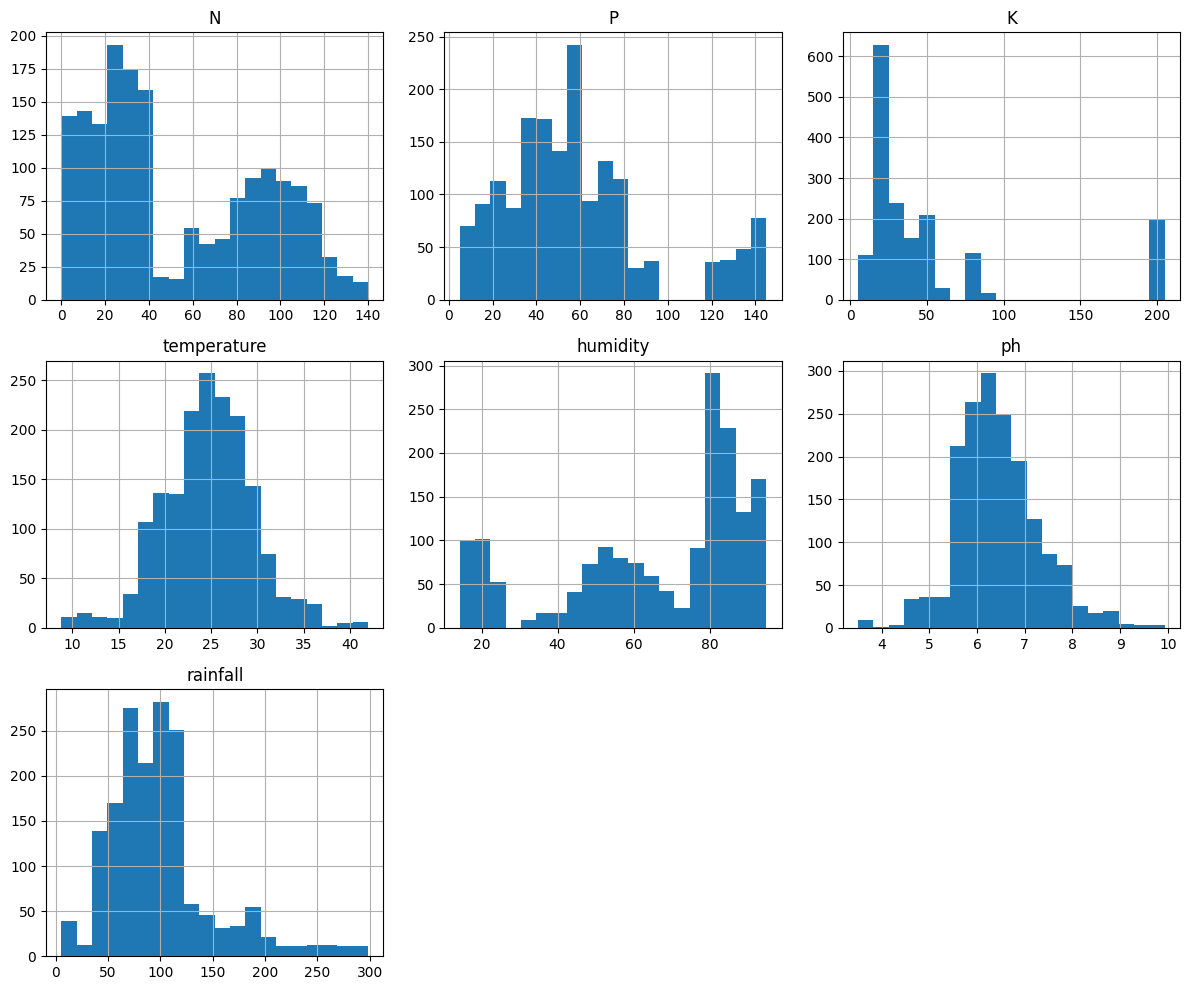

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()



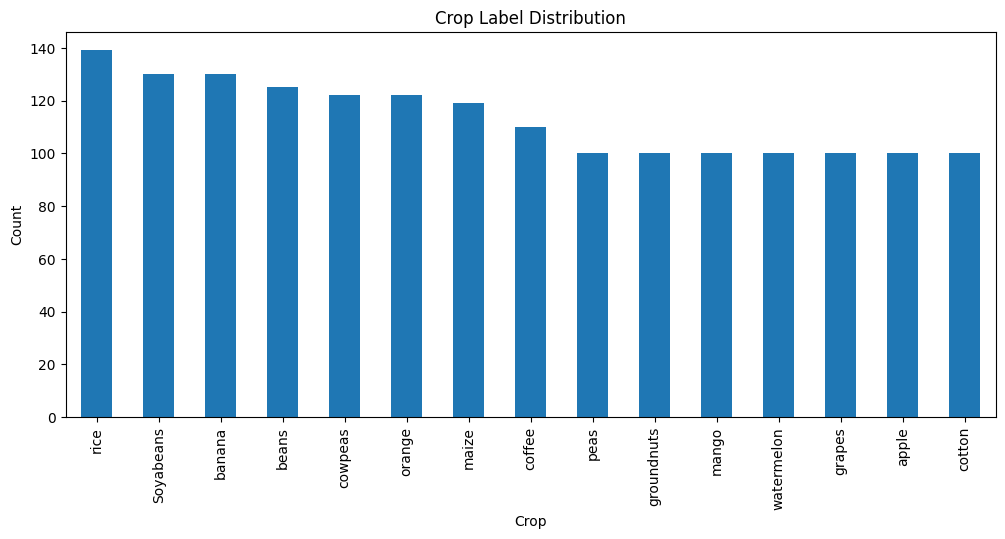

In [4]:
plt.figure(figsize=(12,5))
df['label'].value_counts().plot(kind='bar')
plt.title("Crop Label Distribution")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop("label", axis=1)
y = df["label"]

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        26
       beans       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
     cowpeas       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        20
  groundnuts       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        24
        peas       1.00      1.00      1.00        20
        rice       1.00      1.00      1.00        28
  watermelon       1.00      1.00      1.00        20

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


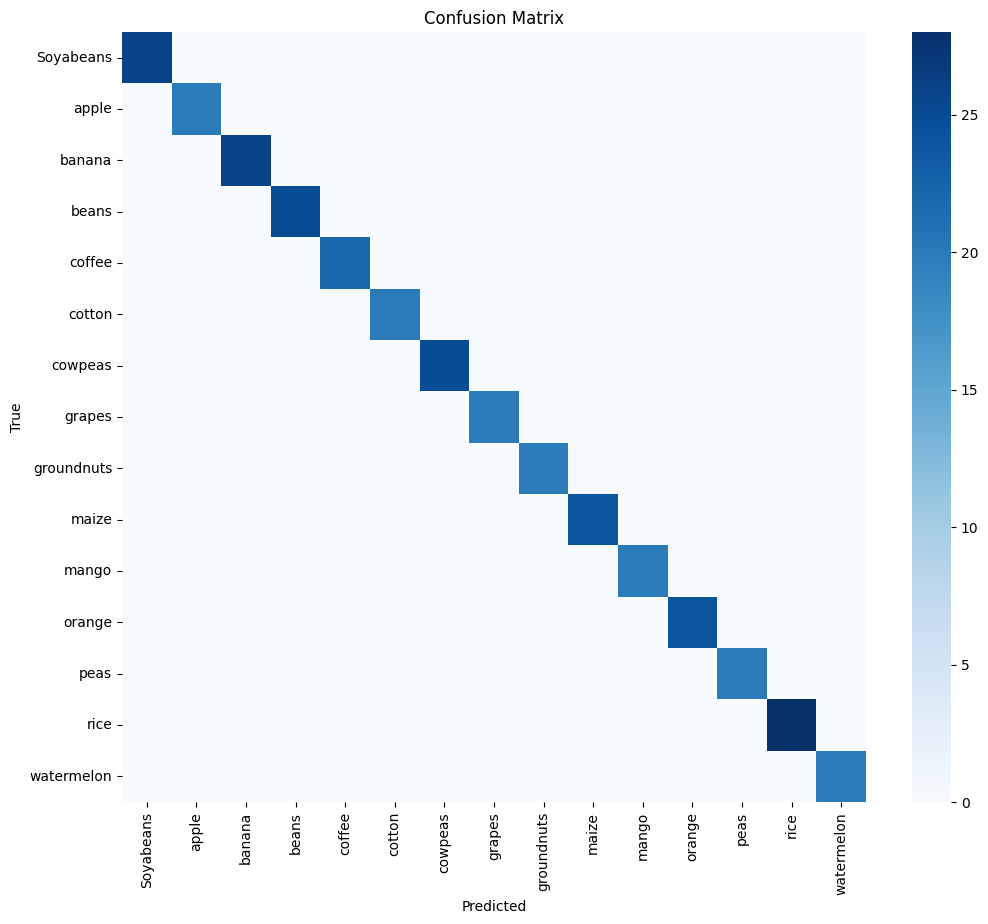

In [9]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


/tmp/ipython-input-673438077.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


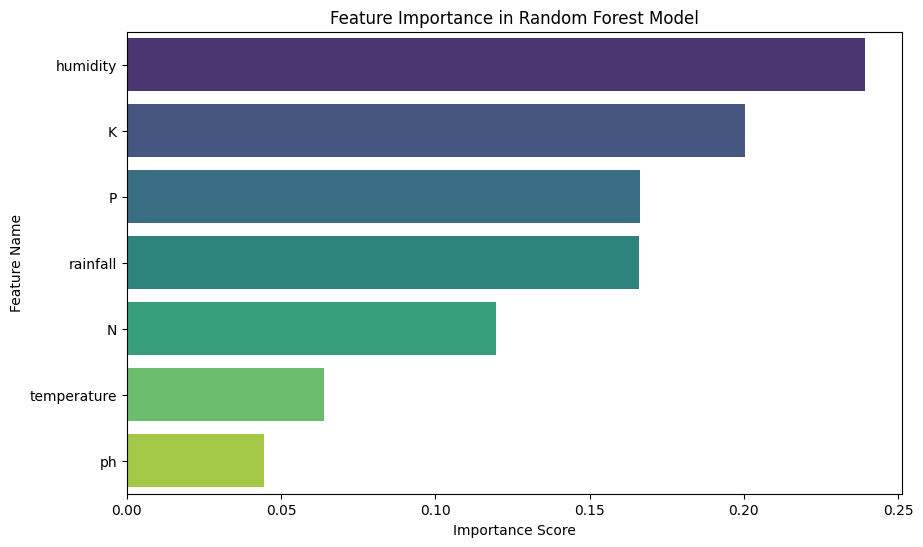

In [10]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()
